Sentiment Analysis of Covergirl Clean Fresh Skin Milk Foundation: Amazon Reviews by Julia Lee.
The csv containing the Amazon Reviews has been obtained by web-scraping using requests and BeautifulSoup as shown in reviews_scraper.py

In [2]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("covergirl-sentiment.csv")

#Data Preprocessing
df.isnull().values.any()
print(df.isnull().sum())
print(df[df['body'].isnull()])
reviews = df.drop(labels=291, axis=0)
reviews = reviews.reset_index(drop=True)


name        0
title       0
date        0
shade     340
rating      0
body        1
dtype: int64
                                            name           title  \
291  Covergirl: Clean Fresh Skin Milk Foundation  Little damaged   

              date shade  rating body  
291  June 24, 2021   NaN       4  NaN  


In [3]:
reviews.dtypes

name      object
title     object
date      object
shade     object
rating     int64
body      object
dtype: object

In [4]:
len(reviews)

957

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


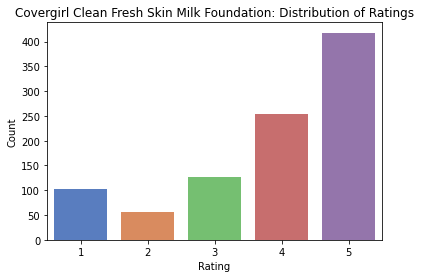

In [5]:
sns.countplot(reviews.rating, palette = "muted").set(title="Covergirl Clean Fresh Skin Milk Foundation: Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("graph1.png")


In [6]:
reviews['body'][1]

'It’s a decent size tube that is a healthier option without parabens, sulfates, and phthalates. The top twist-opens and it squirts out with applied pressure from the tube. It is lightweight and covers very well!! It’s not drying. Good moisturizing liquid foundation. I have sensitive skin and it didn’t break my face out. I like that it has coconut and aloe, which is healing to skin. It did blur out my skin issues. My “before/after” photo shows a great reduction in redness. It was hard to blend out. I did apply this Fair 530 foundation with spot application method (after a thin layer over entire face/neck, I went back and applied a spot touch to the red spot by my jawline and allow to set for a minute before softly blending out). That means it is applied thicker, with layers, to my skin flaws. I could still see where the flaw was located, but it removed the redness so much that people would have to be very close to notice the skin issue. Covers well and stayed on during the workday.'

In [7]:
import contractions

#add length of reviews column
length = [len(reviews['body'][i]) for i in range(len(reviews))]
reviews['length'] = length

#expand contractions so words like don't become do not
#prevents don't to become do and n't
#prevents removing punctuation to break words
for i in range(len(reviews)):
  reviews['body'][i] = contractions.fix(reviews['body'][i])

/var/folders/2p/zb7cm8d17mzb5v16r_sq2cn00000gn/T/ipykernel_7523/2610395952.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['body'][i] = contractions.fix(reviews['body'][i])


In [8]:
reviews['body'][1]

'It is a decent size tube that is a healthier option without parabens, sulfates, and phthalates. The top twist-opens and it squirts out with applied pressure from the tube. It is lightweight and covers very well!! It is not drying. Good moisturizing liquid foundation. I have sensitive skin and it did not break my face out. I like that it has coconut and aloe, which is healing to skin. It did blur out my skin issues. My “before/after” photo shows a great reduction in redness. It was hard to blend out. I did apply this Fair 530 foundation with spot application method (after a thin layer over entire face/neck, I went back and applied a spot touch to the red spot by my jawline and allow to set for a minute before softly blending out). That means it is applied thicker, with layers, to my skin flaws. I could still see where the flaw was located, but it removed the redness so much that people would have to be very close to notice the skin issue. Covers well and stayed on during the workday.'

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

stopWords = set(stopwords.words('english')) - {'not'} - {'no'}
stopWords_withnot = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
#removes punctuation and splits a string into list of separate strings/words

token_body = []
for i in range(len(reviews)):
  token = tokenizer.tokenize(reviews['body'][i])
  tokenxsw = [word.lower() for word in token if not word in stopWords]
  token_body.append(tokenxsw)

reviews['token_body'] = token_body

#change date format
reviews['date'] = pd.to_datetime(reviews['date'])

In [10]:
reviews.head(3)

,name,title,date,shade,rating,body,length,token_body
0,Covergirl: Clean Fresh Skin Milk Foundation,Didn’t get to try because......,2020-01-24,560 Medium,1,There were little hard pieces of something all...,101,"[there, little, hard, pieces, something, throu..."
1,Covergirl: Clean Fresh Skin Milk Foundation,Healthy Coverage,2019-12-06,520 Fair,4,It is a decent size tube that is a healthier o...,994,"[it, decent, size, tube, healthier, option, wi..."
2,Covergirl: Clean Fresh Skin Milk Foundation,You NEED this in your life!,2020-03-17,570 Medium/Tan,5,I love this so so much! It is perfect for ever...,477,"[i, love, much, it, perfect, everyday, makeup,..."


In [11]:
#add polarity column
#polarity is a float within [-1,1]
#-1 is negative polarity, 1 is positive polarity
#Textblob calculates polarity by using an "averaging" technique to compute a polarity score for a single word - same technique used for a group of words
from textblob import TextBlob 
polarity = [TextBlob(reviews['body'][i]).polarity for i in range(len(reviews))]
reviews['polarity'] = polarity

In [12]:
reviews.head(3)

,name,title,date,shade,rating,body,length,token_body,polarity
0,Covergirl: Clean Fresh Skin Milk Foundation,Didn’t get to try because......,2020-01-24,560 Medium,1,There were little hard pieces of something all...,101,"[there, little, hard, pieces, something, throu...",-0.357292
1,Covergirl: Clean Fresh Skin Milk Foundation,Healthy Coverage,2019-12-06,520 Fair,4,It is a decent size tube that is a healthier o...,994,"[it, decent, size, tube, healthier, option, wi...",0.205833
2,Covergirl: Clean Fresh Skin Milk Foundation,You NEED this in your life!,2020-03-17,570 Medium/Tan,5,I love this so so much! It is perfect for ever...,477,"[i, love, much, it, perfect, everyday, makeup,...",0.337500


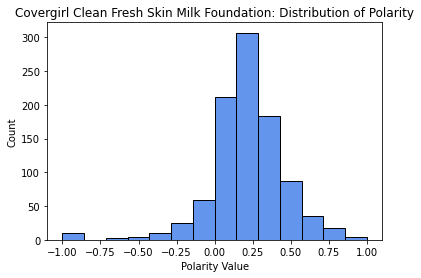

In [13]:
plt.hist(reviews['polarity'], bins = 14, align='mid', color = "cornflowerblue", edgecolor = 'black')
plt.xlabel('Polarity Value')
plt.ylabel('Count')
plt.title("Covergirl Clean Fresh Skin Milk Foundation: Distribution of Polarity")
plt.savefig("graph2.png")

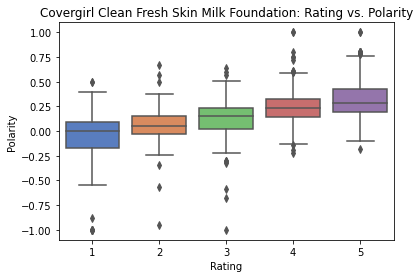

In [14]:
sns.boxplot(x = 'rating', y = 'polarity', data =reviews, palette='muted')
plt.xlabel("Rating")
plt.ylabel("Polarity")
plt.title("Covergirl Clean Fresh Skin Milk Foundation: Rating vs. Polarity")
plt.savefig("graph3.png")

In [15]:
positive = reviews[reviews['rating'] >= 4]
positive = positive.reset_index(drop=True)
negative = reviews[reviews['rating'] <= 2]
negative = negative.reset_index(drop=True)

In [54]:
neutral = reviews[reviews['rating'] == 3]
neutral = neutral.reset_index(drop=True)

In [16]:
len(positive)/len(reviews)

0.7011494252873564

In [17]:
positive.head(3)

,name,title,date,shade,rating,body,length,token_body,polarity
0,Covergirl: Clean Fresh Skin Milk Foundation,Healthy Coverage,2019-12-06,520 Fair,4,It is a decent size tube that is a healthier o...,994,"[it, decent, size, tube, healthier, option, wi...",0.205833
1,Covergirl: Clean Fresh Skin Milk Foundation,You NEED this in your life!,2020-03-17,570 Medium/Tan,5,I love this so so much! It is perfect for ever...,477,"[i, love, much, it, perfect, everyday, makeup,...",0.337500
2,Covergirl: Clean Fresh Skin Milk Foundation,Big fan!,2020-01-05,550 Light/Medium,5,This is essentially a tinted moisturizer. That...,550,"[this, essentially, tinted, moisturizer, that,...",0.273810


In [55]:
#combine all positive reviews into one string for wordcloud
#repeat for all negative reviews

pos_text = ''
for i in range(len(positive)):
  pos_text += ' '.join(positive['token_body'][i])

neg_text = ''
for i in range(len(negative)):
  neg_text += ' '.join(negative['token_body'][i])

neu_text = ''
for i in range(len(neutral)):
  neu_text += ' '.join(neutral['token_body'][i]) 

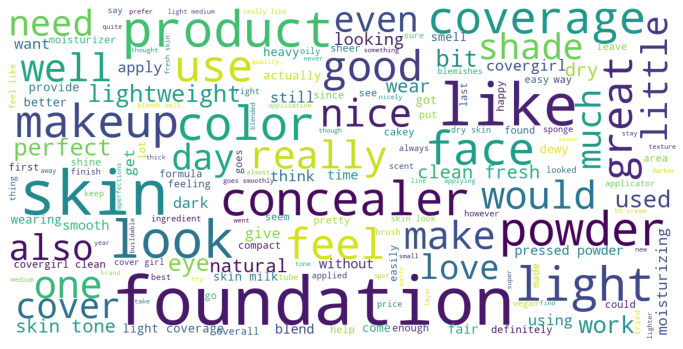

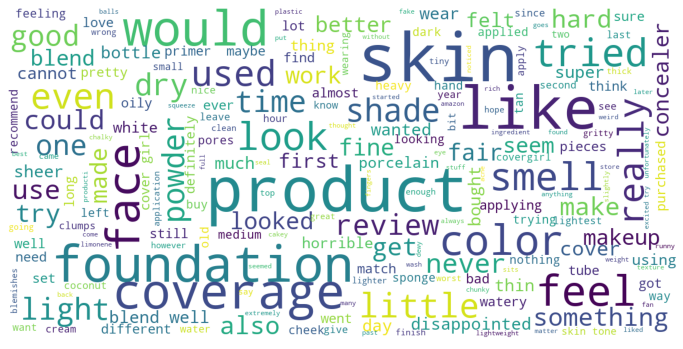

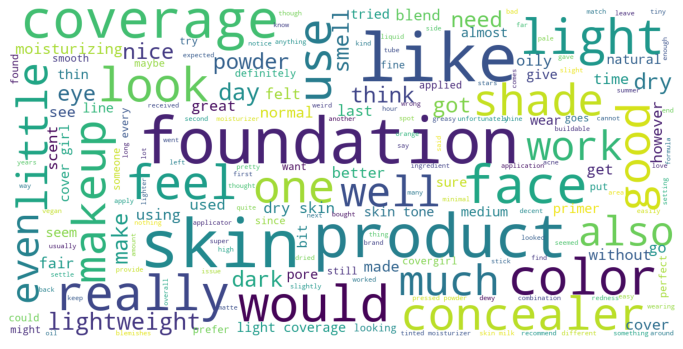

In [56]:
from wordcloud import WordCloud

#from stackoverflow
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopWords_withnot,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    #plt.savefig("poswordcloud.png")
    plt.show()
    

show_wordcloud(pos_text)
show_wordcloud(neg_text)
show_wordcloud(neu_text)



In [20]:
reviews['year'] = pd.DatetimeIndex(reviews['date']).year
reviews

,name,title,date,shade,rating,body,length,token_body,polarity,year
0,Covergirl: Clean Fresh Skin Milk Foundation,Didn’t get to try because......,2020-01-24,560 Medium,1,There were little hard pieces of something all...,101,"[there, little, hard, pieces, something, throu...",-0.357292,2020
1,Covergirl: Clean Fresh Skin Milk Foundation,Healthy Coverage,2019-12-06,520 Fair,4,It is a decent size tube that is a healthier o...,994,"[it, decent, size, tube, healthier, option, wi...",0.205833,2019
2,Covergirl: Clean Fresh Skin Milk Foundation,You NEED this in your life!,2020-03-17,570 Medium/Tan,5,I love this so so much! It is perfect for ever...,477,"[i, love, much, it, perfect, everyday, makeup,...",0.337500,2020
3,Covergirl: Clean Fresh Skin Milk Foundation,Big fan!,2020-01-05,550 Light/Medium,5,This is essentially a tinted moisturizer. That...,550,"[this, essentially, tinted, moisturizer, that,...",0.273810,2020
4,Covergirl: Clean Fresh Skin Milk Foundation,Lightweight good coverage,2020-05-18,560 Medium,3,"Love this foundation, i am a makeup artist and...",471,"[love, foundation, makeup, artist, not, like, ...",-0.031597,2020
...,...,...,...,...,...,...,...,...,...,...
952,Covergirl: Clean Fresh Skin Milk Foundation,Light and airy,2021-02-15,NaN,5,Love this powder - clean and fresh,34,"[love, powder, clean, fresh]",0.388889,2021
953,Covergirl: Clean Fresh Skin Milk Foundation,Moisture and light coverage without settling i...,2021-05-08,540 Light,5,Perfect for us older girls that most makeup se...,199,"[perfect, us, older, girls, makeup, settles, f...",0.489583,2021
954,Covergirl: Clean Fresh Skin Milk Foundation,Nice light coverage,2021-04-15,550 Light/Medium,5,This makeup is light and not like a heavy foun...,363,"[this, makeup, light, not, like, heavy, founda...",0.301190,2021
955,Covergirl: Clean Fresh Skin Milk Foundation,Good at keeping the shine toned down!,2021-02-26,NaN,5,This pressed powder is great for keeping my sh...,274,"[this, pressed, powder, great, keeping, shiny,...",0.223750,2021


In [21]:
reviews_chrono = reviews.sort_values('date', ascending= True)
reviews_2019 = reviews_chrono.loc[pd.DatetimeIndex(reviews_chrono['date']).year == 2019]
reviews_2020 = reviews_chrono.loc[pd.DatetimeIndex(reviews_chrono['date']).year == 2020]
reviews_2021 = reviews_chrono.loc[pd.DatetimeIndex(reviews_chrono['date']).year == 2021]
reviews_2022 = reviews_chrono.loc[pd.DatetimeIndex(reviews_chrono['date']).year == 2022]
reviews_chrono

,name,title,date,shade,rating,body,length,token_body,polarity,year
768,Covergirl: Clean Fresh Skin Milk Foundation,Great concealer,2019-11-27,540 Light,4,This concealer works very well. Nice color mat...,113,"[this, concealer, works, well, nice, color, ma...",0.238333,2019
309,Covergirl: Clean Fresh Skin Milk Foundation,Your Skin But Better,2019-11-29,570 Medium/Tan,5,I do not know what I was expecting from this p...,621,"[i, not, know, i, expecting, product, i, kind,...",0.364773,2019
360,Covergirl: Clean Fresh Skin Milk Foundation,No Talc In This Lightweight Foundation,2019-11-30,570 Medium/Tan,4,CG Smoothers has long been my foundation of ch...,1350,"[cg, smoothers, long, foundation, choice, i, c...",0.270145,2019
664,Covergirl: Clean Fresh Skin Milk Foundation,Average Coverage compared to other Cover girl ...,2019-12-01,630 Deep/Dark,4,The foundation is definitely more liquidy and ...,324,"[the, foundation, definitely, liquidy, not, lo...",0.528571,2019
550,Covergirl: Clean Fresh Skin Milk Foundation,"Fair/Light, Skim Milky freshness!",2019-12-01,530 Fair/Light,5,This creamy mixture goes on so smoothly! I jus...,461,"[this, creamy, mixture, goes, smoothly, i, lov...",0.241736,2019
...,...,...,...,...,...,...,...,...,...,...
234,Covergirl: Clean Fresh Skin Milk Foundation,little things in it,2022-01-17,520 Fair,3,"if you do not mind clumps of foundation, wtv. ...",90,"[not, mind, clumps, foundation, wtv, feel, bit...",0.000000,2022
230,Covergirl: Clean Fresh Skin Milk Foundation,Lil dark but blends well,2022-01-17,570 Medium/Tan,5,I have only put it on once as of right now but...,71,"[i, put, right, use, week]",0.261905,2022
247,Covergirl: Clean Fresh Skin Milk Foundation,Gritty,2022-01-19,520 Fair,1,"I wanted to love this, but every time i used i...",74,"[i, wanted, love, every, time, used, foundatio...",0.250000,2022
643,Covergirl: Clean Fresh Skin Milk Foundation,Blended well,2022-01-20,NaN,5,"Speaking for Myself, I am not a big makeup per...",171,"[speaking, myself, i, not, big, makeup, person...",0.260000,2022


**I could look at the change in sentiment after new launches/change in product (after good amount of reviews has accumulated)

In [73]:
[len(reviews_2019), len(reviews_2020), len(reviews_2021), len(reviews_2022)]

[161, 549, 228, 19]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


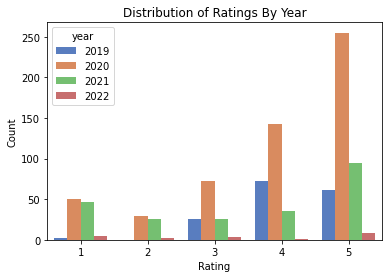

In [22]:
sns.countplot(reviews.rating, hue = reviews.year, palette = 'muted').set(title="Distribution of Ratings By Year")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("graph4.png")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


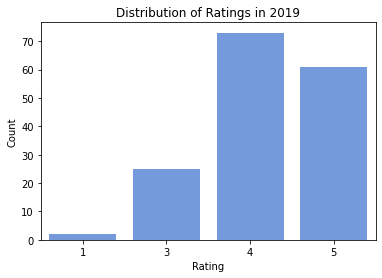

In [23]:
sns.countplot(reviews_2019.rating, color = 'cornflowerblue').set(title = "Distribution of Ratings in 2019")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("graph8.png")

In [24]:
len(reviews_2022)

19

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


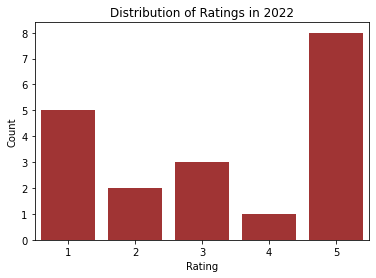

In [25]:
sns.countplot(reviews_2022.rating, color = 'firebrick').set(title = "Distribution of Ratings in 2022")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("graph5.png")

CountVectorizer is a function that breaks down a text into tokens (words).

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bigram_stopwords = set(stopwords.words('english')) - {"no", "not"}

In [27]:
cv = CountVectorizer(stop_words=bigram_stopwords, ngram_range=(2,3))
n_grams = cv.fit_transform(reviews['body'])
#Find frequency of each bigram/trigram
freq_count = n_grams.toarray().sum(axis = 0)
#make new df with bigrams/trigrams and the corresponding frequencies
reviews_ngram = pd.DataFrame(sorted([(freq_count[i], k) for k,i in (cv.vocabulary_).items()], reverse= True)).rename(columns = {0: 'frequency', 1: 'bigram/trigram'})
reviews_ngram.head(30)

,frequency,bigram/trigram
0,101,skin tone
1,90,clean fresh
2,79,light coverage
3,71,pressed powder
4,65,covergirl clean
5,62,skin milk
6,62,covergirl clean fresh
7,59,not feel
8,59,cover girl
9,57,skin not


In [28]:
reviews_ngram['polarity'] = reviews_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
reviews_ngram['subjectivity'] = reviews_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)
#0 means objective, 1 means subjective

In [29]:
reviews_ngram.head(20)

,frequency,bigram/trigram,polarity,subjectivity
0,101,skin tone,0.000000,0.0
1,90,clean fresh,0.333333,0.6
2,79,light coverage,0.400000,0.7
3,71,pressed powder,0.000000,0.0
4,65,covergirl clean,0.366667,0.7
5,62,skin milk,0.000000,0.0
6,62,covergirl clean fresh,0.333333,0.6
7,59,not feel,0.000000,0.0
8,59,cover girl,0.000000,0.0
9,57,skin not,0.000000,0.0


In [30]:
cv2 = CountVectorizer(stop_words=bigram_stopwords, ngram_range=(3,3))
trigrams = cv2.fit_transform(reviews['body'])
#Find frequency of each bigram/trigram
freq_count = trigrams.toarray().sum(axis = 0)
#make new df with bigrams/trigrams and the corresponding frequencies
reviews_trigram = pd.DataFrame(sorted([(freq_count[i], k) for k,i in (cv2.vocabulary_).items()], reverse= True)).rename(columns = {0: 'frequency', 1: 'trigram'})
reviews_trigram.head(30)

,frequency,trigram
0,62,covergirl clean fresh
1,30,fresh skin milk
2,29,clean fresh skin
3,22,clean fresh hydrating
4,21,not feel like
5,21,fresh hydrating concealer
6,19,coconut milk aloe
7,19,clean fresh pressed
8,18,fresh pressed powder
9,16,goes long way


In [31]:
cv3 = CountVectorizer(stop_words=bigram_stopwords, ngram_range=(3,3))
trigrams_pos = cv3.fit_transform(positive['body'])
#Find frequency of each bigram/trigram
freq_count = trigrams_pos.toarray().sum(axis = 0)
#make new df with bigrams/trigrams and the corresponding frequencies
reviews_trigram_pos = pd.DataFrame(sorted([(freq_count[i], k) for k,i in (cv3.vocabulary_).items()], reverse= True)).rename(columns = {0: 'frequency', 1: 'trigram'})
reviews_trigram_pos.head(30)

,frequency,trigram
0,59,covergirl clean fresh
1,27,fresh skin milk
2,27,clean fresh skin
3,21,clean fresh hydrating
4,20,fresh hydrating concealer
5,19,clean fresh pressed
6,18,fresh pressed powder
7,18,coconut milk aloe
8,17,not feel like
9,16,goes long way


Some positive takeaways seem to be that it "goes long way", it doesn't have "phthlates parabens sulfates", "little goes long" way

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


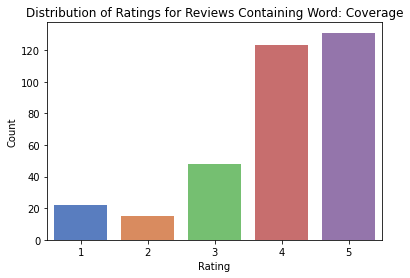

In [64]:
coverage = reviews[reviews['body'].str.contains("coverage")]
sns.countplot(coverage.rating, palette = 'muted').set(title = "Distribution of Ratings for Reviews Containing Word: Coverage")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("graph100.png", bbox_inches = "tight")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


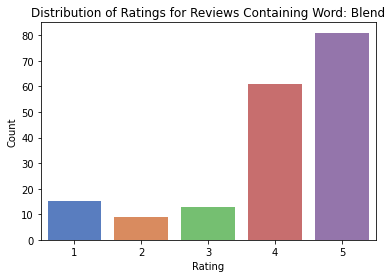

In [66]:
blend = reviews[reviews['body'].str.contains("blend")]
sns.countplot(blend.rating, palette = 'muted').set(title = "Distribution of Ratings for Reviews Containing Word: Blend")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("graph101.png", bbox_inches = "tight")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


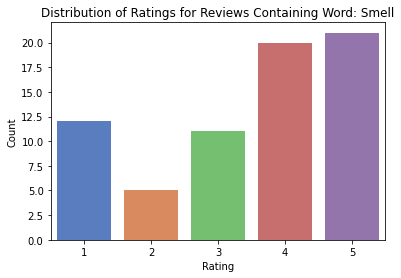

In [101]:
smell = reviews[reviews['body'].str.contains("smell")]
sns.countplot(smell.rating, palette = 'muted').set(title = "Distribution of Ratings for Reviews Containing Word: Smell")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("graph102.png", bbox_inches = "tight")

In [115]:
print(len(smell))
(len(smell[smell.rating == 1]) + len(smell[smell.rating == 2])) / len(smell)

69


0.2463768115942029

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


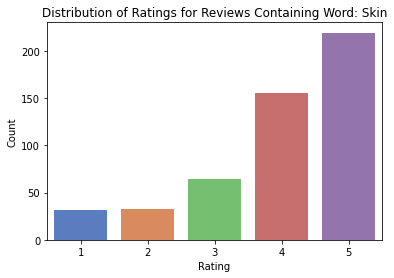

In [70]:
skin = reviews[reviews['body'].str.contains("skin")]
sns.countplot(skin.rating, palette = 'muted').set(title = "Distribution of Ratings for Reviews Containing Word: Skin")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("graph103.png", bbox_inches = "tight")

In [33]:
cv4 = CountVectorizer(stop_words=bigram_stopwords, ngram_range=(3,3))
trigrams_neg = cv4.fit_transform(negative['body'])
#Find frequency of each bigram/trigram
freq_count = trigrams_neg.toarray().sum(axis = 0)
#make new df with bigrams/trigrams and the corresponding frequencies
reviews_trigram_neg = pd.DataFrame(sorted([(freq_count[i], k) for k,i in (cv4.vocabulary_).items()], reverse= True)).rename(columns = {0: 'frequency', 1: 'trigram'})
reviews_trigram_neg.head(30)

,frequency,trigram
0,10,not blend well
1,3,would not even
2,3,worst foundation ever
3,3,skin not blend
4,3,not feel like
5,3,could not get
6,2,would not recommend
7,2,would not buy
8,2,would not blend
9,2,wanted love product


In [34]:
import numpy as np
from matplotlib.pyplot import figure
shade_df = reviews.dropna(subset='shade')
shade_df = shade_df.reset_index(drop=True)

In [35]:
shade_df.shade.unique()

array(['560 Medium', '520 Fair', '570 Medium/Tan', '550 Light/Medium',
       '530 Fair/Light', '510 Porcelain', '590 Tan/Rich', '600 Rich',
       '540 Light', '610 Rich/Deep', '580 Tan', '630 Deep/Dark',
       '620 Deep', '640 Dark'], dtype=object)

In [36]:
shade_name = [(shade_df['shade'][i].split())[-1] for i in range(len(shade_df))]
shade_df['shade_name'] = shade_name

In [37]:
shade_num = [(shade_df['shade'][i].split())[0] for i in range(len(shade_df))]
shade_df['shade_num'] = shade_num

In [38]:
shade_chrono = shade_df.sort_values('shade_num', ascending= True)
shade_chrono = shade_chrono.reset_index(drop = True)
shade_neg = shade_chrono[shade_chrono['rating'] <= 2]
shade_neg = shade_neg.reset_index(drop = True)
shade_pos = shade_chrono[shade_chrono['rating'] >= 4]
shade_pos = shade_pos.reset_index(drop = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


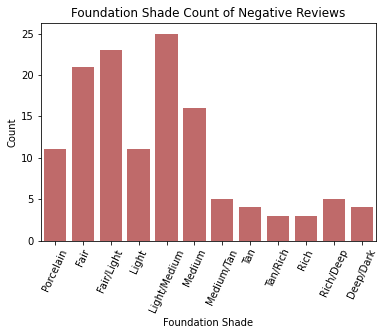

In [39]:
sns.countplot(shade_neg.shade_name, color = "indianred")
plt.xticks(rotation = 65)
plt.xlabel("Foundation Shade")
plt.ylabel("Count")
plt.title("Foundation Shade Count of Negative Reviews")
plt.savefig("graphnegdist.png", bbox_inches = "tight")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


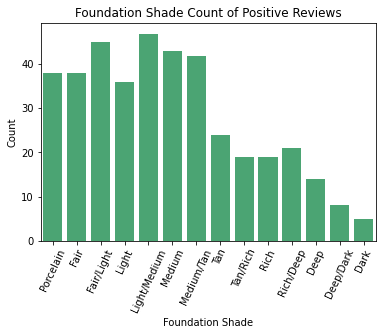

In [40]:
sns.countplot(shade_pos.shade_name, color = "mediumseagreen")
plt.xticks(rotation = 65)
plt.xlabel("Foundation Shade")
plt.ylabel("Count")
plt.title("Foundation Shade Count of Positive Reviews")
#plt.tight_layout()
plt.savefig("shadeposdist.png", bbox_inches = "tight")

In [100]:

pd.options.display.max_rows = 4000
df_plot = shade_chrono.groupby(['rating', 'shade']).size().reset_index().pivot(columns='shade', index='rating', values=0)
#shade_chrono.groupby(['rating', 'shade']).describe().unstack(1)[['length']]
shade_chrono.groupby(['rating', 'shade']).size().reset_index(name = 'counts')
#df_plot.plot(kind='bar', stacked=True, color = ['antiquewhite', 'pink', 'lavender', 'lemonchiffon', 'plum', 'peachpuff', 'sandybrown', 'steelblue', 'burlywood', 'olive', 'chocolate', 'goldenrod', 'sienna', 'black'])
#plt.legend(loc = "center left", bbox_to_anchor = (1, .5))
#plt.xticks(rotation = 0)
#plt.xlabel("Rating")
#plt.ylabel("Count")
#plt.title("Distribution of Foundation Shades in Ratings")
#plt.savefig("graph11.png", bbox_inches = "tight")

,rating,shade,counts
0,1,510 Porcelain,9
1,1,520 Fair,16
2,1,530 Fair/Light,15
3,1,540 Light,7
4,1,550 Light/Medium,17
5,1,560 Medium,9
6,1,570 Medium/Tan,4
7,1,580 Tan,2
8,1,590 Tan/Rich,1
9,1,600 Rich,3


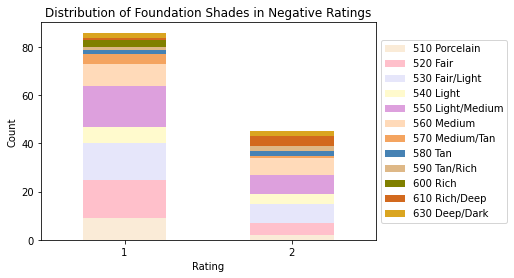

In [42]:
df_plot = shade_neg.groupby(['rating', 'shade']).size().reset_index().pivot(columns='shade', index='rating', values=0)
df_plot.plot(kind='bar', stacked=True, color = ['antiquewhite', 'pink', 'lavender', 'lemonchiffon', 'plum', 'peachpuff', 'sandybrown', 'steelblue', 'burlywood', 'olive', 'chocolate', 'goldenrod', 'sienna', 'black'])
plt.legend(loc = "center left", bbox_to_anchor = (1, .5))
plt.xticks(rotation = 0)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Foundation Shades in Negative Ratings")
plt.savefig("graph12.png", bbox_inches = "tight")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Shade Count of Reviews')

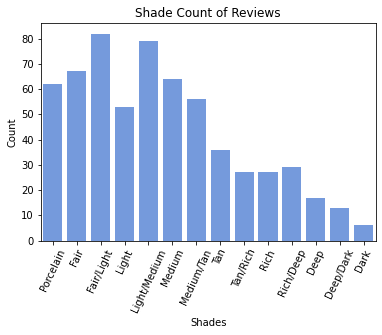

In [43]:
sns.countplot(shade_chrono.shade_name, color = "cornflowerblue")
plt.xticks(rotation = 65)
plt.xlabel("Shades")
plt.ylabel("Count")
plt.title("Shade Count of Reviews")